### Monitoring developmental robustness in reduced-flow conditions (nop-1 RNAi)

Context:
- nop-1 RNAi reduces cortical flows, rendering systems more dependent on PAR-2-based feedback for polarity
- Reduced polarity has knock-on effects for development, leading to adult sterility or, in extreme cases, embryonic lethality
- Performing brood-size assays, where the development of laid eggs is followed
- Comparing PAR-2(wt) vs RRING mutants in control and nop-1 conditions

Results:
- C56S has high baseline lethality and sterility
- Lethality for both RING mutants increases in nop-1 conditions to near 100%

Dependencies:
- Brood size measurments are found in _data/Brood_size_ctrl.csv_ and _data/Brood_size_nop1.csv_

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

mpl.rcParams["figure.dpi"] = 150

if not os.path.exists("Figs"):
    os.mkdir("Figs")

### nop1 data

In [2]:
df = pd.read_csv("../../../data/Brood_size_nop1.csv")
df["Fraction gravid"] = (1 - df["Lethality"]) * (1 - df["Sterility"])
df["Fraction sterile"] = (1 - df["Lethality"]) * df["Sterility"]
df["Fraction dead"] = df["Lethality"]

# Order by fraction dead
df = df.sort_values(by="Fraction dead")

### WT data

In [3]:
df_wt = pd.read_csv("../../../data/Brood_size_wt.csv")
df_wt["Fraction gravid"] = (1 - df_wt["Lethality 5/11/21"]) * (
    1 - df_wt["Sterility 6/11/21"]
)
df_wt["Fraction sterile"] = (1 - df_wt["Lethality 5/11/21"]) * df_wt[
    "Sterility 6/11/21"
]
df_wt["Fraction dead"] = df_wt["Lethality 5/11/21"]

# Order by fraction dead
df_wt = df_wt.sort_values(by="Fraction dead")

### Plot: fraction of progeny

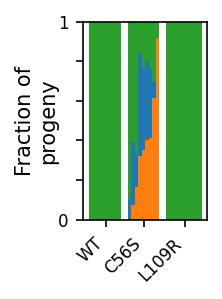

In [4]:
# Control

genotype_order = ["Wild type", "C56S", "L109R"]
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df_wt[df_wt.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row["Fraction dead"], color="tab:orange", width=1)
        ax.bar(
            x=i,
            bottom=row["Fraction dead"],
            height=row["Fraction sterile"],
            color="tab:blue",
            width=1,
        )
        ax.bar(
            x=i,
            bottom=row["Fraction dead"] + row["Fraction sterile"],
            height=row["Fraction gravid"],
            color="tab:green",
            width=1,
        )
        i += 1
    i_max.append(i - 0.5)
    i += 2

tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ["WT", "C56S", "L109R"]
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment("right")
ax.set_ylim(0, 1)
ax.set_ylabel("Fraction of\nprogeny", fontsize=10, labelpad=0)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(["0", "", "", "", "", "1"])
ax.tick_params(axis="both", labelsize=8)
fig.set_size_inches(1.5, 2)
fig.subplots_adjust(left=0.35, bottom=0.22)
fig.savefig("Figs/brood_size_ctrl.png", dpi=600, transparent=True)

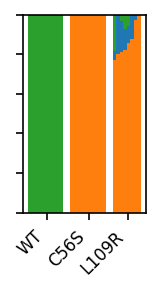

In [5]:
# nop-1

genotype_order = ["WT", "C56S", "L109R"]
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df[df.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row["Fraction dead"], color="tab:orange", width=1)
        ax.bar(
            x=i,
            bottom=row["Fraction dead"],
            height=row["Fraction sterile"],
            color="tab:blue",
            width=1,
        )
        ax.bar(
            x=i,
            bottom=row["Fraction dead"] + row["Fraction sterile"],
            height=row["Fraction gravid"],
            color="tab:green",
            width=1,
        )
        i += 1
    i_max.append(i - 0.5)
    i += 2

tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ["WT", "C56S", "L109R"]
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment("right")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(["", "", "", "", "", ""])
ax.set_xlabel("")
ax.tick_params(axis="both", labelsize=8)
fig.set_size_inches(1.5, 2)
fig.subplots_adjust(left=0.35, bottom=0.22)
fig.savefig("Figs/brood_size_nop1.png", dpi=600, transparent=True)